# Tutorial: Create your own Geometry

## Setup

In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')

In [2]:
import geomstats.backend as gs

INFO: Using numpy backend


## Immersed manifolds

We consider the setting of a manifold given by an immersion into a Euclidean space, i.e. by a map f:
$f: M \rightarrow \mathbb{R}^n$ whose differential $df_x$ is injective for all $x \in M$.

In this notebook, we consider the simple example of the sphere. However, interested users can try out immersions of any 2D surface in the 3D euclidean space.

In [3]:
def sphere_immersion(spherical_coords):
    theta = spherical_coords[..., 0]
    phi = spherical_coords[..., 1]
    return gs.array([
        gs.cos(phi) * gs.sin(theta),
        gs.sin(phi) * gs.sin(theta),
        gs.cos(theta)])

This immersion allows to define the pull-back metric $g$ on $M$, as:
$$g : T_xM \times T_x M \rightarrow \mathbb{R}\\
u, v \rightarrow <df_x.u, df_x.v>$$
where $<,>$ represents the Euclidean inner-product.

In [4]:
from geomstats.geometry.pullback_metric import PullbackMetric

In [5]:
sphere_metric = PullbackMetric(dim=2, embedding_dim=3, immersion=sphere_immersion)

Now, we can access the methods from any Riemannian metric, i.e. the Riemannian exp and log maps, the parallel transport, etc.

We import tools that will be used for visualization purposes:

In [6]:
import matplotlib.pyplot as plt

import geomstats.visualization as viz

from autograd import jacobian

jac_immersion = jacobian(sphere_immersion)

We show the computational of the Riemannian exp map:

In [ ]:
point_a = gs.array([gs.pi / 2. , - gs.pi / 2.])
tangent_vec = gs.array([0., gs.pi / 3.])
end_point = sphere_metric.exp(
    tangent_vec=tangent_vec, base_point=point_a)

And visualize the result:

<IPython.core.display.Javascript object>


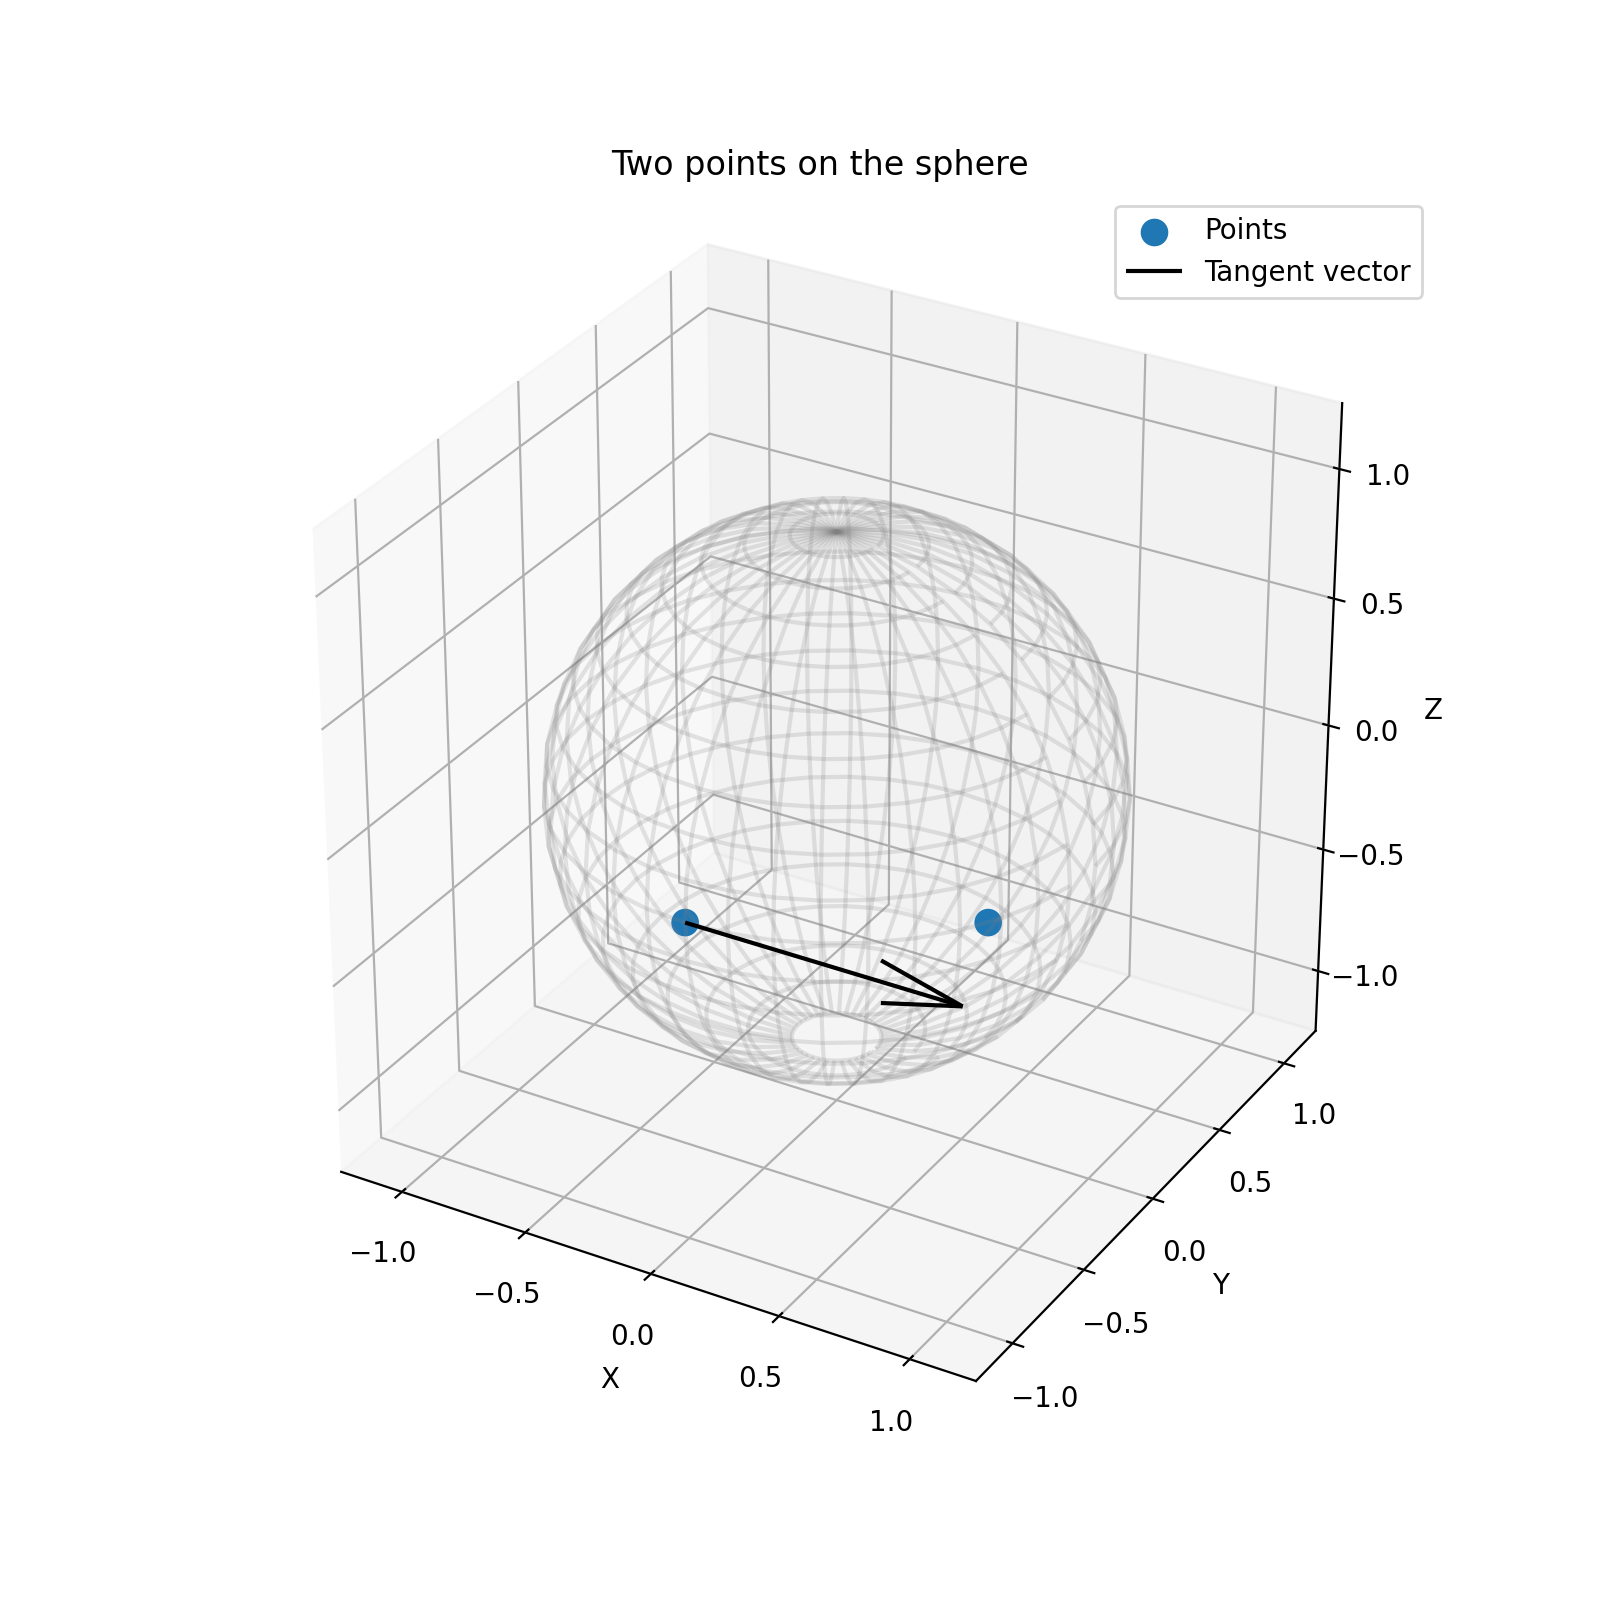

In [12]:
%matplotlib notebook

immersed_point_a = sphere_immersion(point_a)
immersed_tangent_vec = gs.matmul(jac_immersion(point_a), tangent_vec)
immersed_end_point = sphere_immersion(end_point)

two_points = gs.vstack([immersed_point_a, immersed_end_point])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

viz.plot(
    two_points, ax=ax, space='S2', label='Points', s=80)

arrow = viz.Arrow3D(immersed_point_a, vector=immersed_tangent_vec)
arrow.draw(ax, color='black', label="Tangent vector")

ax.set_title('Two points on the sphere')
ax.legend();

We show the computation of the parallel transport on the sphere. Unfortunately, the parallel transport operation is very slow because of the integration performed.

In [14]:
point_a = gs.array([gs.pi / 2. , - gs.pi / 2.])
tangent_vec = gs.array([0., gs.pi / 3.])
tangent_vec_to_transport = gs.array([gs.pi / 4., gs.pi / 3.])

parallel_transport = sphere_metric.ladder_parallel_transport(
    tangent_vec_a=tangent_vec_to_transport, 
    tangent_vec_b=tangent_vec,
    base_point=point_a)

display(parallel_transport)

transported_tangent_vec = parallel_transport["transported_tangent_vec"]
end_point = parallel_transport["end_point"]

{'transported_tangent_vec': array([0.78539816, 1.04719755]),
 'end_point': array([ 1.57079633, -0.52359878]),
 'trajectory': [[]]}

We visualize the result of the parallel transport.

<IPython.core.display.Javascript object>


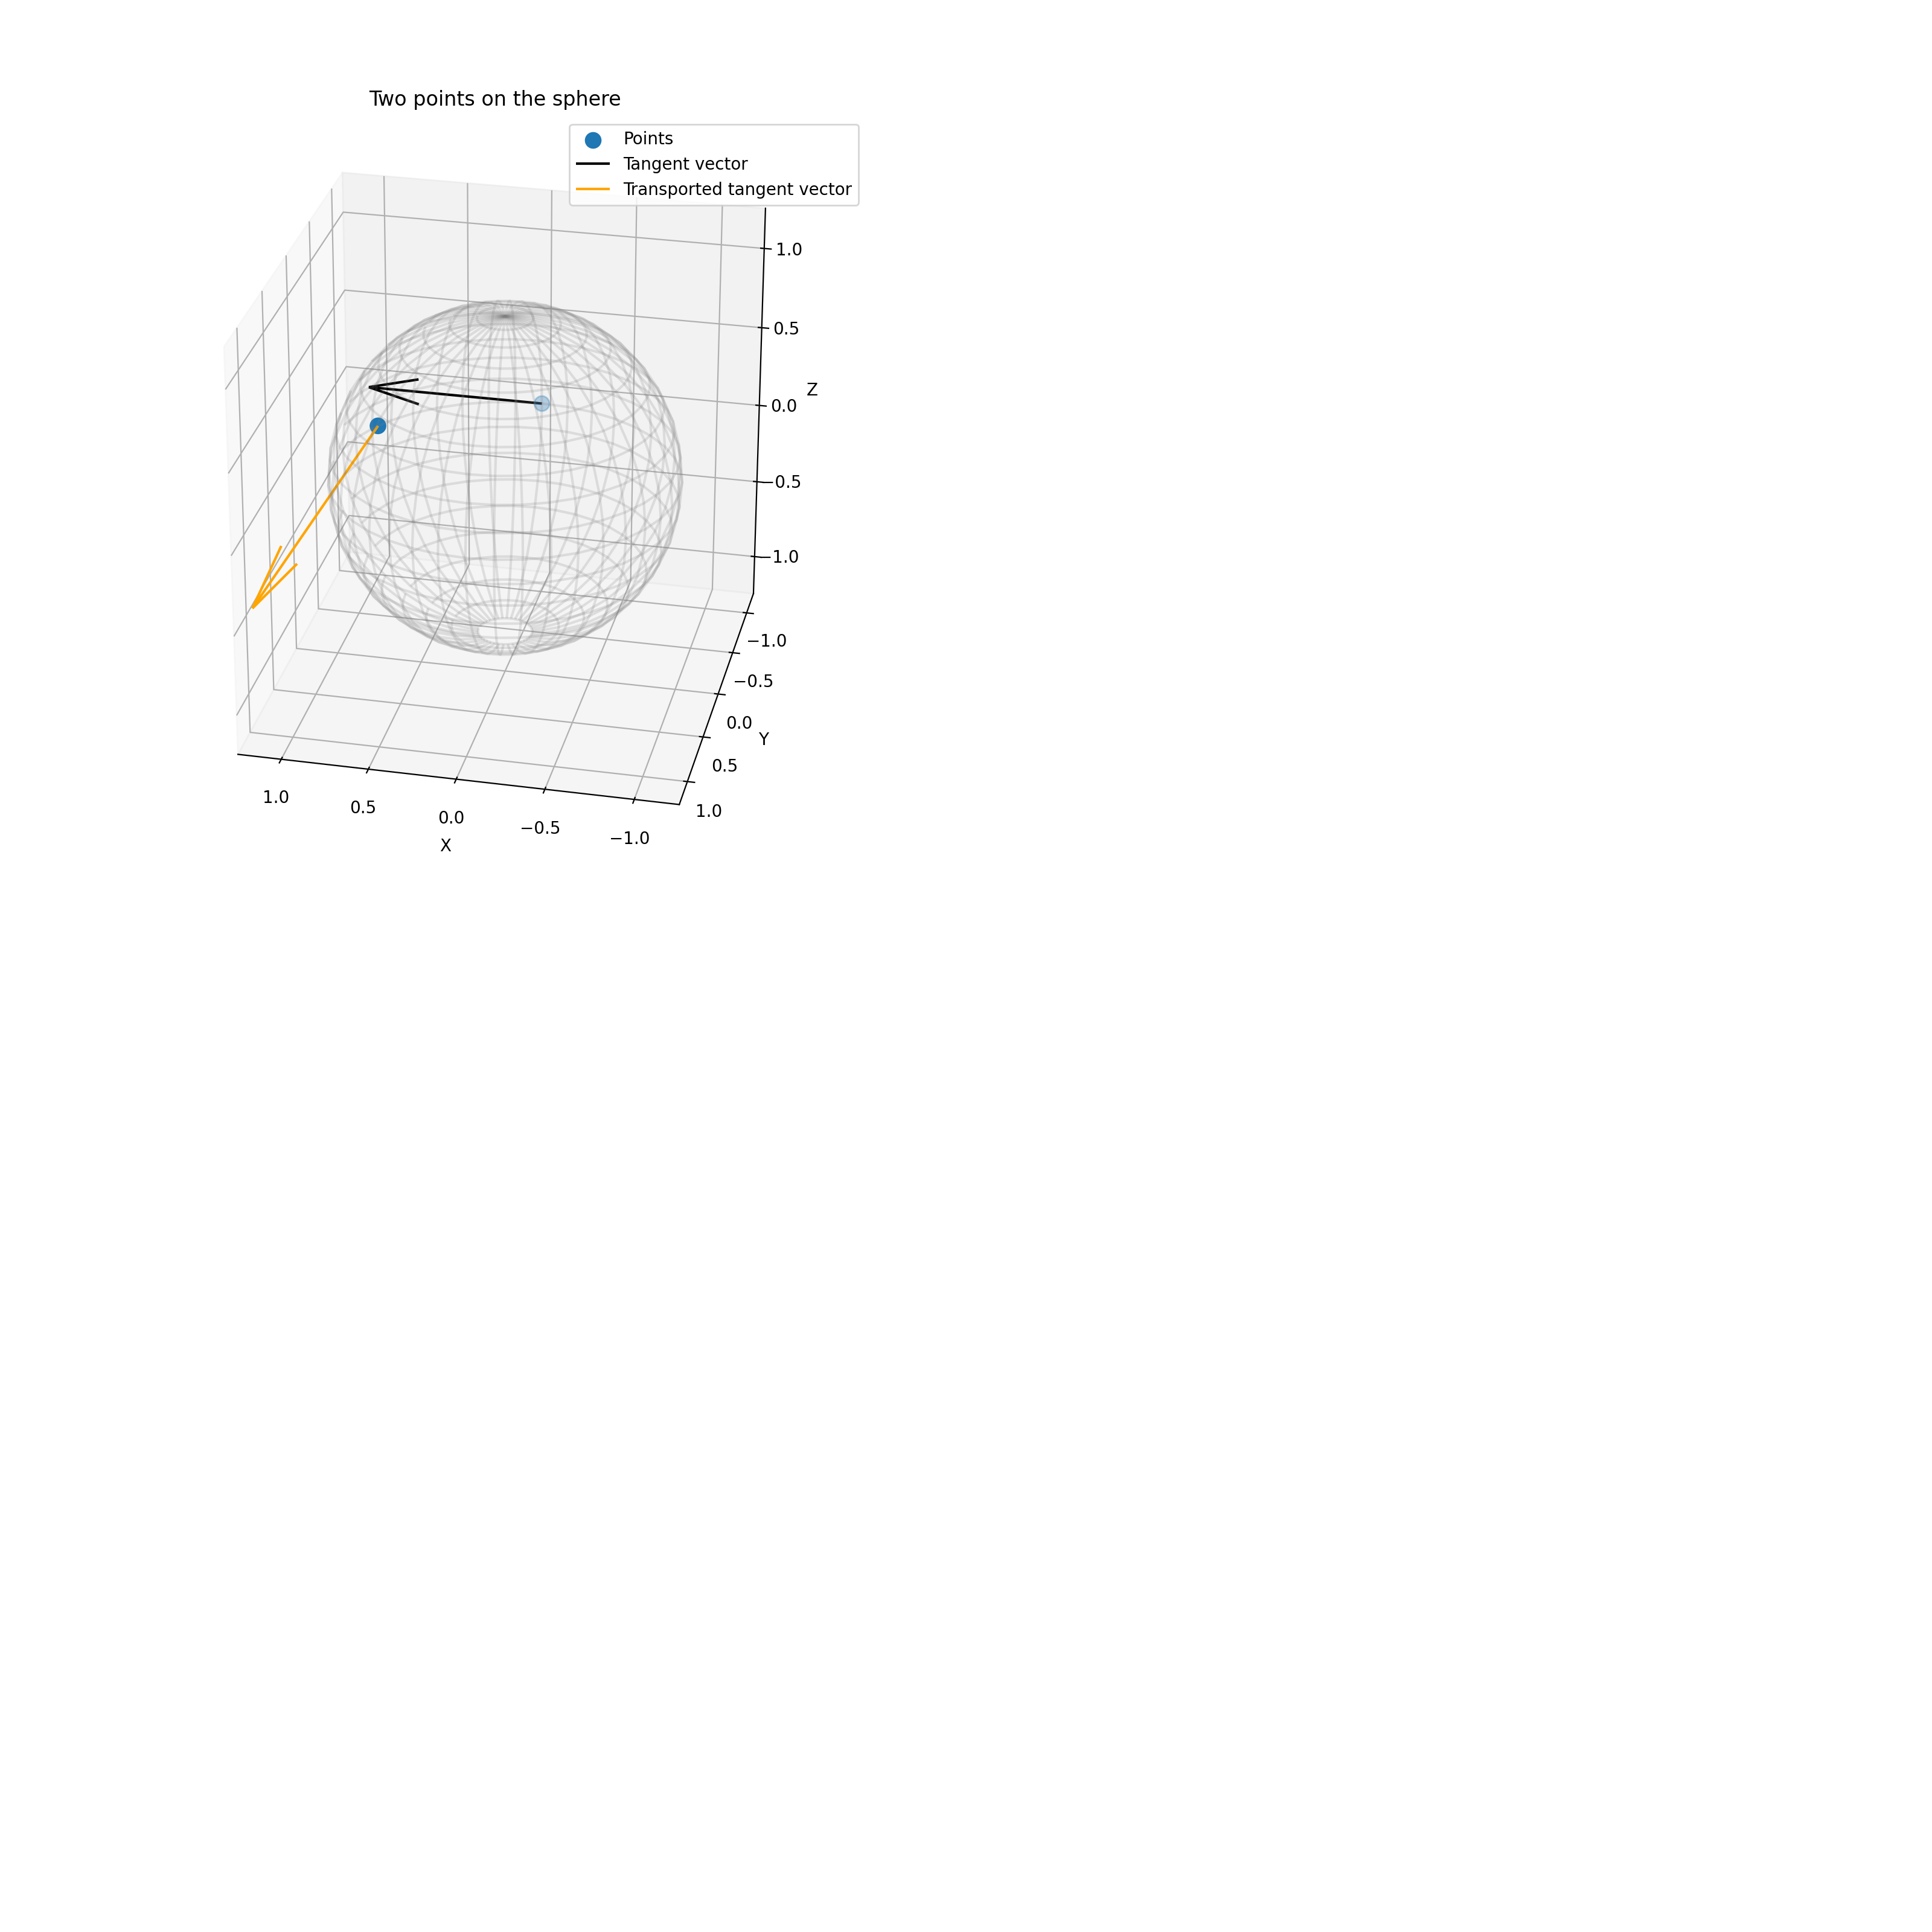

In [15]:
%matplotlib notebook

immersed_point_a = sphere_immersion(point_a)
immersed_tangent_vec = gs.matmul(
    jac_immersion(point_a), tangent_vec)
immersed_end_point = sphere_immersion(end_point)
immersed_transported_tangent_vec = gs.matmul(
    jac_immersion(end_point), transported_tangent_vec)

two_points = gs.vstack([immersed_point_a, immersed_end_point])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

viz.plot(
    two_points, ax=ax, space='S2', label='Points', s=80)

arrow = viz.Arrow3D(immersed_point_a, vector=immersed_tangent_vec)
arrow.draw(ax, color='black', label="Tangent vector")

arrow = viz.Arrow3D(immersed_end_point, vector=immersed_transported_tangent_vec)
arrow.draw(ax, color='orange', label="Transported tangent vector")

ax.set_title('Two points on the sphere')
ax.legend();